# kNN


## Tasks

### Task 1

Import data you need to solve tasks for this lesson. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import matplotlib
matplotlib.rcParams['figure.figsize'] = (12, 8)

import warnings
warnings.filterwarnings('ignore')

In [2]:
circ = pd.read_csv('concertriccir2.csv')

In [3]:
circ.head()

,X,Y,class
0,0.70,-0.247,0.0
1,-3.95,2.740,1.0
2,0.15,-2.160,1.0
3,-1.67,-0.942,1.0
4,2.56,-1.850,1.0


In [4]:
circ.shape

(500, 3)

In [5]:
circ.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X       500 non-null    float64
 1   Y       500 non-null    float64
 2   class   500 non-null    float64
dtypes: float64(3)
memory usage: 11.8 KB


### Task 2

Check target class balance.

In [6]:
circ['class'].value_counts()

0.0    250
1.0    250
Name: class, dtype: int64

### Task 3 

Plot the data.

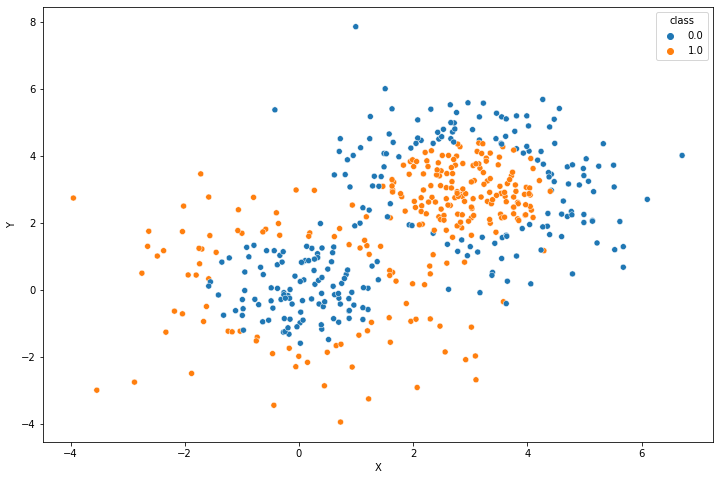

In [7]:
sns.scatterplot(circ['X'], circ['Y'], hue=circ['class']);

### Task 4 

Fit a logistic regression model and check accuracy. 

In [8]:
circ

,X,Y,class
0,0.700,-0.247,0.0
1,-3.950,2.740,1.0
2,0.150,-2.160,1.0
3,-1.670,-0.942,1.0
4,2.560,-1.850,1.0
...,...,...,...
495,2.180,2.980,1.0
496,1.780,2.870,1.0
497,0.894,3.070,0.0
498,0.849,3.880,0.0


In [9]:
X = circ.drop(['class'], axis=1)
y = circ['class']

In [10]:
from sklearn.linear_model import LogisticRegression


model = LogisticRegression()
model.fit(X, y)

LogisticRegression()

In [11]:
print(f'Linear regression accuracy: {model.score(X, y)}')

Linear regression accuracy: 0.424


### Task 5

Render a separating hyperplane for a linear model. 

In [12]:
intercept = model.intercept_[0]
beta1 = model.coef_[0][0]
beta2 = model.coef_[0][1]

In [13]:
m = -1 * beta1 / beta2
c = -1 * intercept / beta2

In [14]:
x_vals = np.array([np.min(circ['X']), np.max(circ['X'])])

In [15]:
y_vals = m * x_vals + c

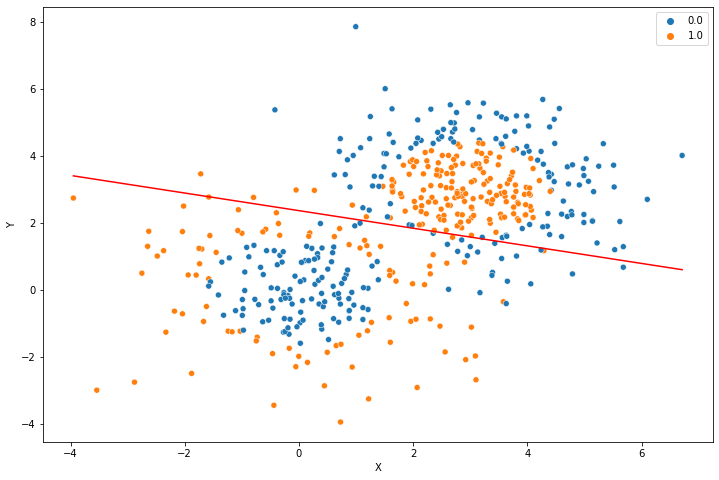

In [16]:
sns.scatterplot(circ['X'], circ['Y'], hue=circ['class'])
sns.lineplot(x_vals, y_vals, color='r');

### Task 6 

Split data on train and test samples.

In [17]:
X = circ[['X', 'Y']].values
y = circ['class'].values.astype('int')

In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, 
                                                    shuffle=True, random_state=2022)

### Task 7 

Find the best `n_neighbors` parameter for a kNN model. 

In [19]:
from sklearn.neighbors import KNeighborsClassifier

all_k = [1, 3, 10, 30, 40, 60]
result = dict()


for k in all_k:
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train, y_train)
    result[k] = [model.score(X_train, y_train), model.score(X_test, y_test)]

In [20]:
for k, v in result.items():
    print(f'Neighbors={k}: Train accuracy={v[0]:.2f}; Test accuracy={v[1]}')

Neighbors=1: Train accuracy=1.00; Test accuracy=0.89
Neighbors=3: Train accuracy=0.95; Test accuracy=0.87
Neighbors=10: Train accuracy=0.92; Test accuracy=0.85
Neighbors=30: Train accuracy=0.85; Test accuracy=0.74
Neighbors=40: Train accuracy=0.80; Test accuracy=0.75
Neighbors=60: Train accuracy=0.69; Test accuracy=0.73


### Task 8

Load another dataset for the next few tasks.

In [21]:
df = pd.read_csv('processed_sigma_cabs.csv')

In [22]:
df.head()

,Trip_Distance,Customer_Since_Months,Life_Style_Index,Customer_Rating,Cancellation_Last_1Month,Var1,Var2,Var3,Surge_Pricing_Type,Type_of_Cab_B,...,Destination_Type_F,Destination_Type_G,Destination_Type_H,Destination_Type_I,Destination_Type_J,Destination_Type_K,Destination_Type_L,Destination_Type_M,Destination_Type_N,Gender_Male
0,6.77,1.0,2.42769,3.90500,0,40.0,46,60,2,1,...,0,0,0,0,0,0,0,0,0,0
1,29.47,10.0,2.78245,3.45000,0,38.0,56,78,2,1,...,0,0,0,0,0,0,0,0,0,1
2,41.58,10.0,2.79805,3.50125,2,61.0,56,77,2,1,...,0,0,0,0,0,0,0,0,0,1
3,61.56,10.0,2.79805,3.45375,0,61.0,52,74,3,0,...,0,0,0,0,0,0,0,0,0,1
4,54.95,10.0,3.03453,3.40250,4,51.0,49,102,2,0,...,0,0,0,0,0,0,0,0,0,1


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 131662 entries, 0 to 131661
Data columns (total 29 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   Trip_Distance                  131662 non-null  float64
 1   Customer_Since_Months          131662 non-null  float64
 2   Life_Style_Index               131662 non-null  float64
 3   Customer_Rating                131662 non-null  float64
 4   Cancellation_Last_1Month       131662 non-null  int64  
 5   Var1                           131662 non-null  float64
 6   Var2                           131662 non-null  int64  
 7   Var3                           131662 non-null  int64  
 8   Surge_Pricing_Type             131662 non-null  int64  
 9   Type_of_Cab_B                  131662 non-null  int64  
 10  Type_of_Cab_C                  131662 non-null  int64  
 11  Type_of_Cab_D                  131662 non-null  int64  
 12  Type_of_Cab_E                 

In [24]:
df.shape

(131662, 29)

### Task 9

Check target class balance.

In [25]:
df['Surge_Pricing_Type'].value_counts()

2    56728
3    47720
1    27214
Name: Surge_Pricing_Type, dtype: int64

In [26]:
df['Surge_Pricing_Type'].value_counts(normalize=True)

2    0.430861
3    0.362443
1    0.206696
Name: Surge_Pricing_Type, dtype: float64

### Task 10

Split the data. 

In [27]:
X = df.drop('Surge_Pricing_Type', axis=1)
y = df['Surge_Pricing_Type']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, 
                                                    shuffle=True, random_state=2022)

### Task 11

Find the best `n_neighbors` parameter for a kNN model. 

In [28]:
all_k = [1, 5, 10]
result = dict()

for k in all_k:
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train, y_train)
    result[k] = [model.score(X_train, y_train), model.score(X_test, y_test)]

In [29]:
for k, v in result.items():
    print(f'Neighbors={k}: Train accuracy={v[0]:.4f}; Test accuracy={v[1]:.4f}')

Neighbors=1: Train accuracy=1.0000; Test accuracy=0.4382
Neighbors=5: Train accuracy=0.6303; Test accuracy=0.4432
Neighbors=10: Train accuracy=0.5849; Test accuracy=0.4704


### Task 12

Now scale the data first and then find the best `n_neighbors` parameter for a kNN model. 

In [30]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [31]:
all_k = [1, 5, 10]
result = dict()

for k in all_k:
    pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('knn', KNeighborsClassifier(n_neighbors=k))
    ])
    pipe.fit(X_train, y_train)
    result[k] = [pipe.score(X_train, y_train), pipe.score(X_test, y_test)]

In [32]:
for k, v in result.items():
    print(f'Neighbors={k}: Train accuracy={v[0]:.4f}; Test accuracy={v[1]:.4f}')

Neighbors=1: Train accuracy=1.0000; Test accuracy=0.5649
Neighbors=5: Train accuracy=0.7349; Test accuracy=0.6304
Neighbors=10: Train accuracy=0.7076; Test accuracy=0.6608


### Task 13

Fit a kNN model using `minkowski` distance with a parameter `p=1`.

In [33]:
pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('knn', KNeighborsClassifier(n_neighbors=10, metric='minkowski',  p=1))
    ])

pipe.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('knn', KNeighborsClassifier(n_neighbors=10, p=1))])

In [34]:
print(f'Train accuracy={pipe.score(X_train, y_train):.4f}; Test accuracy={pipe.score(X_test, y_test):.4f}')

Train accuracy=0.7077; Test accuracy=0.6611


### Task 14

Use another dataset for the next tasks. 

In [35]:
df = pd.read_csv('housing.csv')

In [36]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [37]:
df.shape

(20640, 10)

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


### Task 15

Split the data. Use `latitude` and `longitude` as features to predict the target `median_house_value`.

In [39]:
X = df[['longitude', 'latitude']]
y = df['median_house_value']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, 
                                                    shuffle=True, random_state=2022)

### Task 16

Visualise a scatterplot of your data.

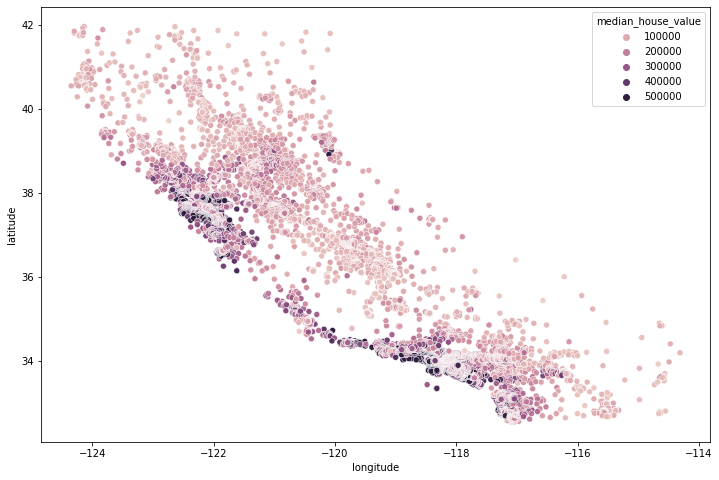

In [40]:
sns.scatterplot(data=X, x='longitude', y='latitude', hue=y);

### Task 17

Train kNN model using Gaussian kernel as a weighting parameter. 

In [41]:
from sklearn.metrics import mean_squared_error
from sklearn.neighbors import KNeighborsRegressor


for h in np.arange(0.02, 0.1, 0.01):
    def kernel(distances, h=h):
        const = 1 / (np.sqrt(2 * np.pi))
        power = (-1/2) * ((distances)**2) / h**2
        return const * np.exp(power)

    pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('knn', KNeighborsRegressor(n_neighbors=10, weights=kernel))
    ])
    
    pipe.fit(X_train, y_train)
    
    print(f'kNN Gaussian kernel h={h:.2f} RMSE: {(mean_squared_error(y_test, pipe.predict(X_test)))**.5:.4f}')

kNN Gaussian kernel h=0.02 RMSE: 52872.6786
kNN Gaussian kernel h=0.03 RMSE: 52943.3861
kNN Gaussian kernel h=0.04 RMSE: 53021.8377
kNN Gaussian kernel h=0.05 RMSE: 53071.0790
kNN Gaussian kernel h=0.06 RMSE: 53103.2262
kNN Gaussian kernel h=0.07 RMSE: 53126.7555
kNN Gaussian kernel h=0.08 RMSE: 53144.5397
kNN Gaussian kernel h=0.09 RMSE: 53158.0972
